In [1]:
from RKF45 import RKF45
from Roots import roots
import numpy as np
from numba import jit
from itertools import product
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

In [10]:
n = 100

def F(t, p, n=100, m=1., a=0.001, b=10., g=9.8):
    x, y, px, py = p[:n], p[n: 2*n], p[2*n: 3*n], p[3*n:]
    
    y[y < 0] = 0
    py[y < 0] *= -1
    
    x[x < 0] = 0
    x[x > 1] = 1
    px[(x < 0) | (x > 1)] *= -1
    
    fx, fy = 0, 0
    for j in xrange(n):
        fj = 2 * b * np.exp(-((x - x[j])**2. + (y - y[j])**2.) / a) / a
        fx += (x - x[j]) * fj
        fy += (y - y[j]) * fj
    fy -= g * m
    
    return np.concatenate([px / m, py / m, fx, fy])

p0 = np.zeros(4 * n)
x, y = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
x, y = x.flatten(), y.flatten()
for i in xrange(n):
    p0[i], p0[n + i] = x[i], y[i]

sln = RKF45(F, p0, 2., fkwargs=dict(n=100, m=1., a=0.0001, b=100., g=9.8), max_steps=1000, tol=0.1)

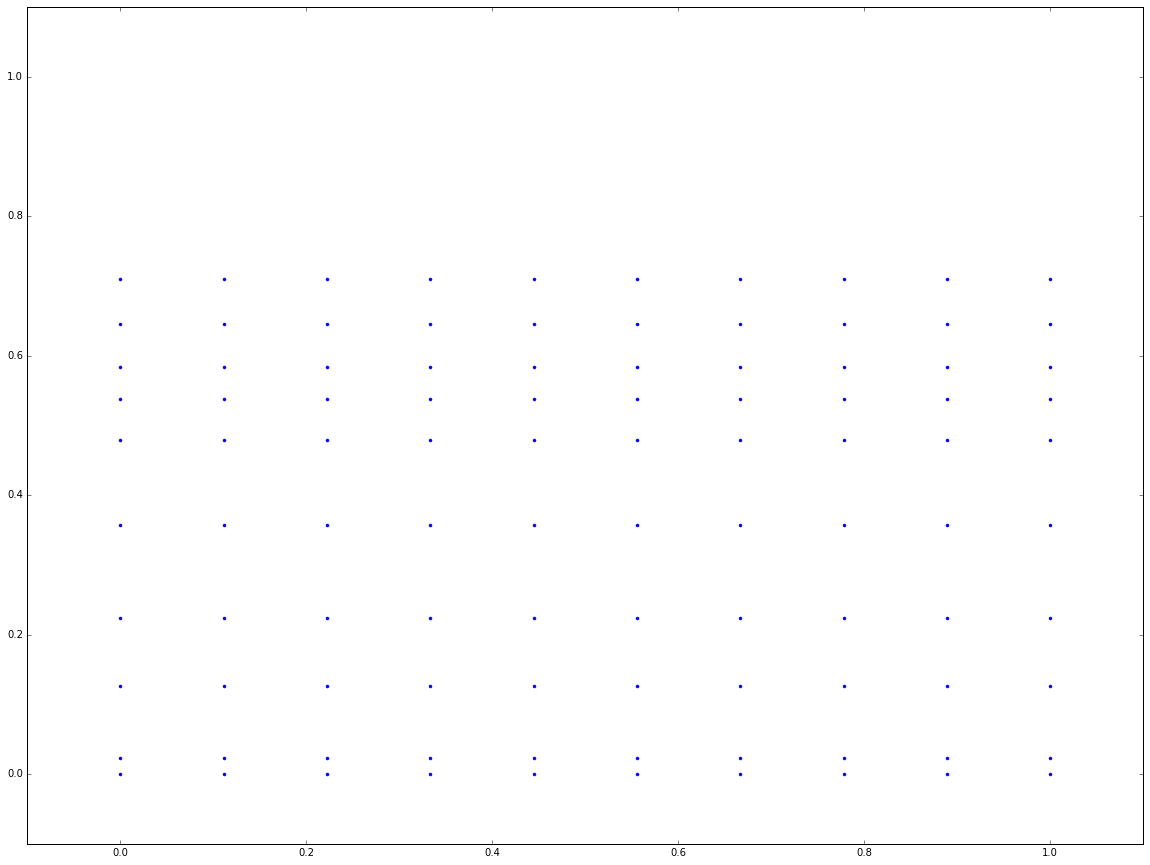

In [11]:
p = sln(1.9)
x, y = p[:n], p[n: 2*n]
plt.plot(x, y, '.')
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()